# ANN - Artificial Neural Network

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import metrics 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical

## MFCC

In [75]:
mfcc_df = pd.read_csv('../../../Data/Features/MFCC_Data.csv',index_col=0)

In [76]:
mfcc_df.head()

,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,MFCC_10,...,MFCC_42,MFCC_43,MFCC_44,MFCC_45,MFCC_46,MFCC_47,MFCC_48,MFCC_49,MFCC_50,Label
12,-289.21213,110.805435,-21.313496,15.978510,-22.054483,3.363043,-11.504783,4.508069,-4.662264,4.716395,...,0.059355,2.855525,1.902572,-0.555519,1.149774,2.588985,1.999745,-1.386203,-1.444516,ang
27,-257.24110,99.345795,-10.082610,29.844202,-9.154385,3.967014,-12.355303,-1.142314,-10.105771,-5.000117,...,0.989184,0.651739,0.792287,1.076015,-0.238661,1.113345,1.410870,0.780703,1.017746,ang
29,-162.67676,97.780200,-46.044758,14.602550,-16.414543,1.585601,-16.828533,-6.045789,-7.403815,2.705874,...,0.827159,-0.507063,0.961427,0.716429,-0.255313,0.953160,0.523185,-0.263831,0.031629,ang
30,-440.63580,130.743640,0.374263,29.192797,-6.186107,13.845780,-11.397534,9.895559,-3.589840,6.202628,...,-0.201709,2.073562,0.830128,-0.185219,-0.298924,1.384827,-0.419494,0.965666,-0.594039,sad
31,-454.82550,133.810840,-1.461820,33.532536,-11.242642,18.659878,-11.550693,15.192266,-6.038576,10.610360,...,-0.389133,1.939244,0.504643,0.578664,-0.076486,1.395140,-0.559993,-0.541744,-1.073842,sad


### Number of labels

In [77]:
new_lab = mfcc_df['Label']
count_lab= len(mfcc_df['Label'].value_counts())
count_lab

3

### Extract features and labels and store it in variables for further model training

In [78]:
features = mfcc_df.drop(['Label'], axis=1).values
lab = mfcc_df['Label'].values

# Convert features and corresponding classification labels into numpy arrays
X = np.array(features.tolist())
y = np.array(lab.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

### Split the data into training and testing set

In [79]:
# split the dataset 
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.25, random_state = 4)

In [80]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2421, 50)
(2421, 3)
(807, 50)
(807, 3)


### Build Model

In [81]:
mfcc_ann_model = Sequential()
mfcc_ann_model.add(Dense(64, input_dim=50, activation='relu'))
mfcc_ann_model.add(Dense(count_lab, activation='softmax'))  

### MFCC ANN Model Summary

In [82]:
mfcc_ann_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                3264      
                                                                 
 dense_9 (Dense)             (None, 3)                 195       
                                                                 
Total params: 3,459
Trainable params: 3,459
Non-trainable params: 0
_________________________________________________________________


### Compile & Fit Model

In [83]:
mfcc_ann_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [84]:
num_epochs = 50
num_batch_size = 128

mfcc_ann_his = mfcc_ann_model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), verbose=1)

Epoch 1/50
19/19 [==============================] - 2s 22ms/step - loss: 5.5806 - accuracy: 0.4040 - val_loss: 3.6196 - val_accuracy: 0.4077
Epoch 2/50
19/19 [==============================] - 0s 9ms/step - loss: 2.4403 - accuracy: 0.5171 - val_loss: 2.1068 - val_accuracy: 0.5341
Epoch 3/50
19/19 [==============================] - 0s 6ms/step - loss: 1.6920 - accuracy: 0.5869 - val_loss: 1.6964 - val_accuracy: 0.5898
Epoch 4/50
19/19 [==============================] - 0s 6ms/step - loss: 1.4022 - accuracy: 0.6080 - val_loss: 1.4014 - val_accuracy: 0.6022
Epoch 5/50
19/19 [==============================] - 0s 6ms/step - loss: 1.2025 - accuracy: 0.6188 - val_loss: 1.2723 - val_accuracy: 0.6084
Epoch 6/50
19/19 [==============================] - 0s 5ms/step - loss: 1.0474 - accuracy: 0.6402 - val_loss: 1.1517 - val_accuracy: 0.6431
Epoch 7/50
19/19 [==============================] - 0s 6ms/step - loss: 0.9499 - accuracy: 0.6584 - val_loss: 1.1374 - val_accuracy: 0.6183
Epoch 8/50
19/19 [=

### Evaluating the model on the training and testing set


In [85]:
# Evaluating the model on the training and testing set
mfccscore = mfcc_ann_model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: {0:.2%}".format(mfccscore[1]))

mfccscore = mfcc_ann_model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: {0:.2%}".format(mfccscore[1]))

Training Accuracy: 75.30%
Testing Accuracy: 71.00%


### Plot Epochs for Accracy and Loss

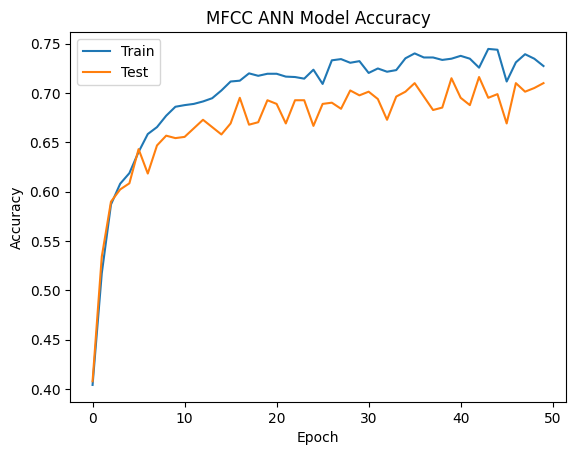

In [86]:
plt.plot(mfcc_ann_his.history['accuracy'])
plt.plot(mfcc_ann_his.history['val_accuracy'])
plt.title('MFCC ANN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

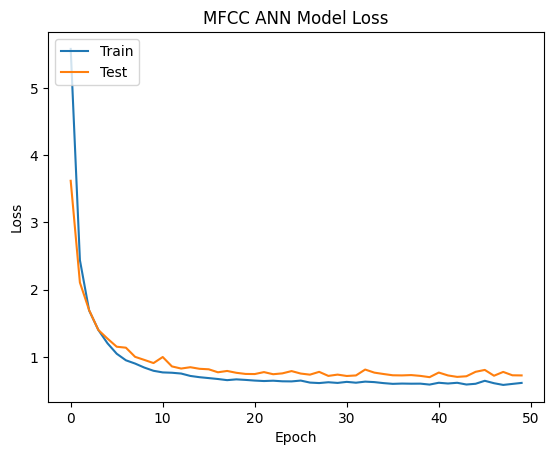

In [87]:
plt.plot(mfcc_ann_his.history['loss'])
plt.plot(mfcc_ann_his.history['val_loss'])
plt.title('MFCC ANN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Confusion Matrix

In [91]:
mfcc_predictions = mfcc_ann_model.predict(x_test)
y_pred_mfcc= np.array(mfcc_predictions)
y_true_mfcc = np.array(y_test)
# Convert predicted probabilities to binary predictions
y_pred_binary_mfcc = np.argmax(y_pred_mfcc, axis=1)
y_true_binary_mfcc = np.argmax(y_true_mfcc, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true_binary_mfcc, y_pred_binary_mfcc)

26/26 [==============================] - 0s 2ms/step


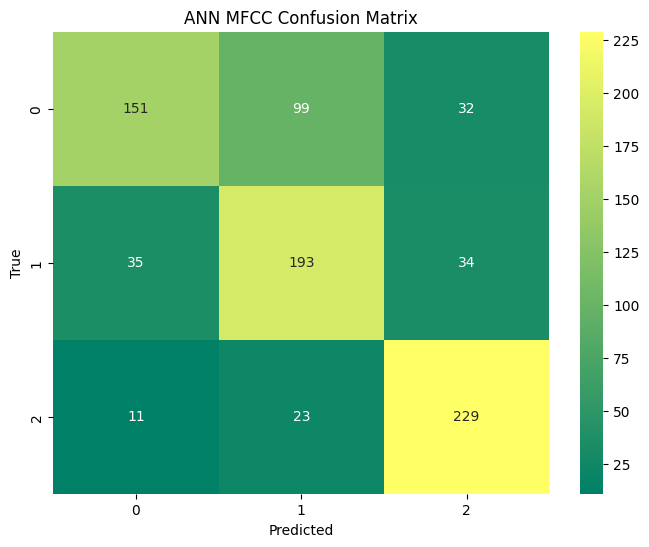

In [95]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="summer")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('ANN MFCC Confusion Matrix')
plt.show()

### PCP Feature

In [96]:
pcp_df = pd.read_csv('../../../Data/Features/PCP_Data.csv',index_col=0)

In [97]:
pcp_df.head()

,PCP1,PCP2,PCP3,PCP4,PCP5,PCP6,PCP7,PCP8,PCP9,PCP10,PCP11,PCP12,Label
12,0.468665,0.418584,0.470229,0.402123,0.438475,0.465702,0.430603,0.472777,0.384107,0.399642,0.339348,0.520844,ang
27,0.463213,0.431536,0.431190,0.410230,0.384602,0.391240,0.444501,0.380445,0.379131,0.423372,0.379215,0.408315,ang
29,0.393176,0.394829,0.384227,0.407025,0.433312,0.394724,0.341926,0.305187,0.309041,0.324220,0.306156,0.315559,ang
30,0.546842,0.518859,0.569832,0.522063,0.484166,0.571499,0.470337,0.477768,0.473719,0.458764,0.482684,0.630568,sad
31,0.690118,0.551490,0.515464,0.597981,0.554355,0.688720,0.588746,0.407920,0.408882,0.432478,0.442955,0.572069,sad


### Extract features and Labels

In [98]:
pcpf = pcp_df.drop(['Label'], axis=1).values
pcp_lab = pcp_df['Label'].values
count= len(pcp_lab)

### Convert features and corresponding classification labels into numpy arrays

In [99]:
X_pcp = np.array(pcpf.tolist())
y_pcp = np.array(pcp_lab.tolist())

### Encode the classification labels

In [100]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(y_pcp)
encoded_labels = to_categorical(encoded_labels)

### Split dataset into training and testing

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_pcp, encoded_labels, test_size=0.2, random_state=21)

In [102]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2421, 50)
(2582, 3)
(807, 50)
(646, 3)


### Build Model

In [103]:
pcp_ann_model = Sequential()
pcp_ann_model.add(Dense(256, activation='relu', input_shape=(12,)))
pcp_ann_model.add(Dropout(0.3))
pcp_ann_model.add(Dense(128, activation='relu'))
pcp_ann_model.add(Dropout(0.3))
pcp_ann_model.add(Dense(3, activation='softmax'))

### MFCC ANN Model Summary

In [104]:
pcp_ann_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               3328      
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 3)                 387       
                                                                 
Total params: 36,611
Trainable params: 36,611
Non-trainable params: 0
_________________________________________________________________


### Compile and Fit the model

In [105]:
pcp_ann_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [106]:
pcp_his=pcp_ann_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
81/81 [==============================] - 2s 12ms/step - loss: 1.0820 - accuracy: 0.3776 - val_loss: 1.0407 - val_accuracy: 0.4690
Epoch 2/50
81/81 [==============================] - 0s 5ms/step - loss: 1.0192 - accuracy: 0.4787 - val_loss: 0.9978 - val_accuracy: 0.4365
Epoch 3/50
81/81 [==============================] - 0s 6ms/step - loss: 0.9566 - accuracy: 0.5240 - val_loss: 0.9018 - val_accuracy: 0.5170
Epoch 4/50
81/81 [==============================] - 0s 5ms/step - loss: 0.9321 - accuracy: 0.5426 - val_loss: 0.8789 - val_accuracy: 0.5495
Epoch 5/50
81/81 [==============================] - 0s 6ms/step - loss: 0.9177 - accuracy: 0.5380 - val_loss: 0.8942 - val_accuracy: 0.5619
Epoch 6/50
81/81 [==============================] - 0s 6ms/step - loss: 0.9243 - accuracy: 0.5105 - val_loss: 0.8725 - val_accuracy: 0.5573
Epoch 7/50
81/81 [==============================] - 0s 5ms/step - loss: 0.9097 - accuracy: 0.5290 - val_loss: 0.8681 - val_accuracy: 0.5697
Epoch 8/50
81/81 [=

### Evaluating the model on the training and testing set


In [107]:
pcpscore = pcp_ann_model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: {0:.2%}".format(pcpscore[1]))

pcpscore = pcp_ann_model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: {0:.2%}".format(pcpscore[1]))

Training Accuracy: 57.71%
Testing Accuracy: 58.20%


### Plot Epochs for Accracy and Loss

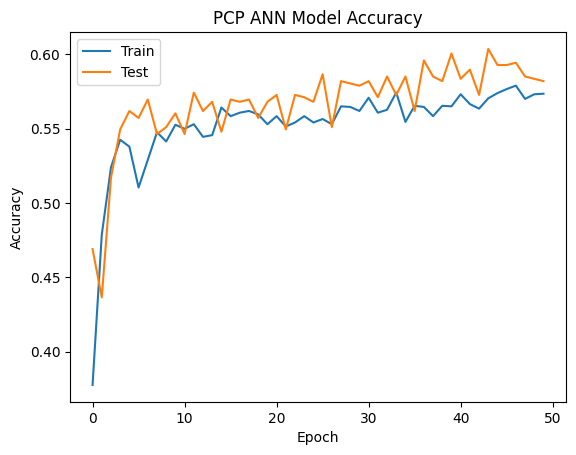

In [108]:
plt.plot(pcp_his.history['accuracy'])
plt.plot(pcp_his.history['val_accuracy'])
plt.title('PCP ANN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

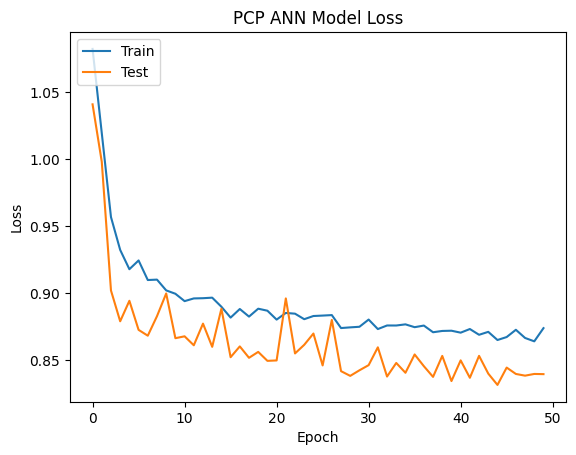

In [109]:
plt.plot(pcp_his.history['loss'])
plt.plot(pcp_his.history['val_loss'])
plt.title('PCP ANN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Confusion Matrix

In [111]:
pcp_predictions = pcp_ann_model.predict(X_test)
y_pred_pcp= np.array(pcp_predictions)
y_true_pcp = np.array(y_test)
# Convert predicted probabilities to binary predictions
y_pred_binary_pcp = np.argmax(y_pred_pcp, axis=1)
y_true_binary_pcp = np.argmax(y_true_pcp, axis=1)


21/21 [==============================] - 0s 2ms/step


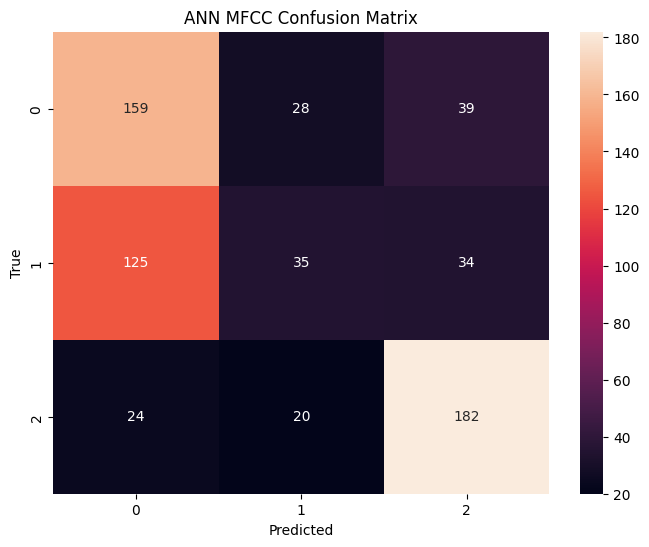

In [117]:
# Create confusion matrix
cmpcp = confusion_matrix(y_true_binary_pcp, y_pred_binary_pcp)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmpcp, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('ANN PCP Confusion Matrix')
plt.show()

## LCP Feature

In [118]:
df_lcpp = pd.read_csv('../../../Data/Features/LCP_data.csv',index_col=0)

In [119]:
df_lcpp.head()

,LCP1,LCP2,LCP3,LCP4,LCP5,LCP6,LCP7,LCP8,LCP9,LCP10,LCP11,Label
12,1.0,-4.620619,11.216498,-18.965210,24.804852,-26.135841,22.393353,-15.348988,8.033380,-2.891480,0.543560,ang
27,1.0,-4.243772,9.878223,-16.549742,21.832207,-23.426395,20.516266,-14.562426,8.120422,-3.267545,0.721418,ang
29,1.0,-4.550903,10.997309,-18.775156,24.923088,-26.633648,23.093740,-16.064710,8.651243,-3.271798,0.654612,ang
30,1.0,50.537933,-286.185970,745.173340,-1258.394200,1555.833300,-1455.320100,1020.872900,-502.843230,140.464550,-10.920460,sad
31,1.0,125.109380,-540.967000,1161.417100,-1682.114900,1787.451500,-1398.142600,757.090600,-213.570710,-31.442951,34.692960,sad


In [120]:
df_lcpp.shape

(3228, 12)

### Extract features and Labels

In [121]:
lcpf = df_lcpp.drop(['Label'], axis=1).values
lcp_lab = df_lcpp['Label'].values
lcpcount= len(lcp_lab)

### Convert features and corresponding classification labels into numpy arrays

In [122]:
X_lcp = np.array(lcpf.tolist())
y_lcp = np.array(lcp_lab.tolist())

### Encode the classification labels

In [123]:
label_encoder = LabelEncoder()
encoded_labels_lcp = label_encoder.fit_transform(y_lcp)
encoded_labels_lcp = to_categorical(encoded_labels_lcp)

### Split data inot training and testing set

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_lcp, encoded_labels_lcp, test_size=0.2, random_state=21)

### Build the model

In [125]:
lcp_ann_model = Sequential()
lcp_ann_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
lcp_ann_model.add(Dense(64, activation='relu'))
lcp_ann_model.add(Dense(len(label_encoder.classes_), activation='softmax'))

### Model Summary

In [126]:
lcp_ann_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 128)               1536      
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 3)                 195       
                                                                 
Total params: 9,987
Trainable params: 9,987
Non-trainable params: 0
_________________________________________________________________


### Compile and Fit the model

In [127]:
# Compile the model
lcp_ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [128]:
lcp_his = lcp_ann_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
81/81 [==============================] - 2s 8ms/step - loss: 4652.3838 - accuracy: 0.3292 - val_loss: 81.3970 - val_accuracy: 0.3498
Epoch 2/50
81/81 [==============================] - 0s 4ms/step - loss: 942.4612 - accuracy: 0.3211 - val_loss: 165.5396 - val_accuracy: 0.3762
Epoch 3/50
81/81 [==============================] - 0s 4ms/step - loss: 929.8635 - accuracy: 0.3613 - val_loss: 157.8996 - val_accuracy: 0.3700
Epoch 4/50
81/81 [==============================] - 0s 4ms/step - loss: 796.2284 - accuracy: 0.3532 - val_loss: 87.5458 - val_accuracy: 0.3700
Epoch 5/50
81/81 [==============================] - 0s 4ms/step - loss: 842.4122 - accuracy: 0.3575 - val_loss: 265.2538 - val_accuracy: 0.3669
Epoch 6/50
81/81 [==============================] - 0s 3ms/step - loss: 1188.2263 - accuracy: 0.3633 - val_loss: 252.3726 - val_accuracy: 0.3731
Epoch 7/50
81/81 [==============================] - 0s 3ms/step - loss: 1113.3541 - accuracy: 0.3590 - val_loss: 239.4645 - val_accuracy

### Evaluating the model on the training and testing set


In [129]:
lcpscore = lcp_ann_model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: {0:.2%}".format(lcpscore[1]))

lcpscore = lcp_ann_model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: {0:.2%}".format(lcpscore[1]))

Training Accuracy: 37.18%
Testing Accuracy: 40.71%


### Plot Epochs for Accracy and Loss

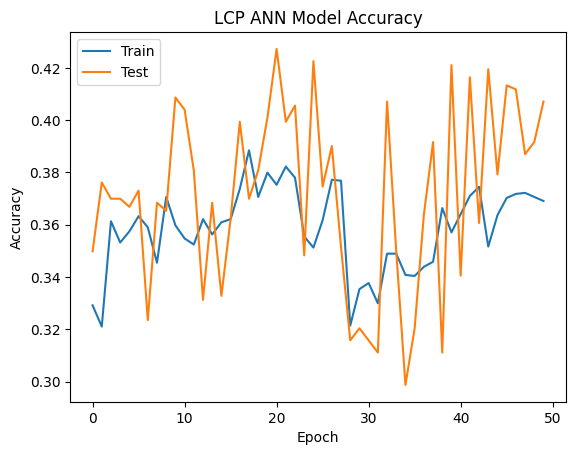

In [130]:
plt.plot(lcp_his.history['accuracy'])
plt.plot(lcp_his.history['val_accuracy'])
plt.title('LCP ANN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

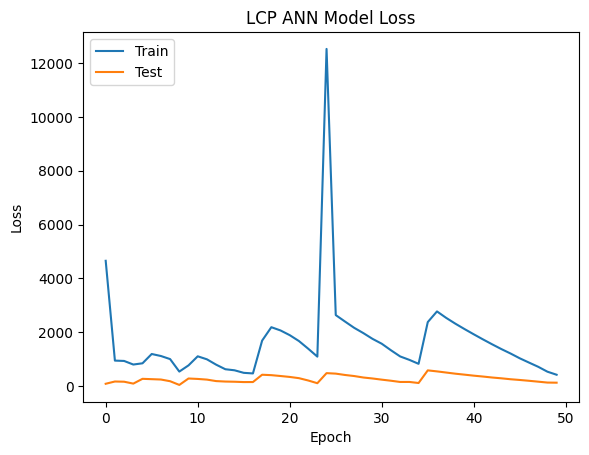

In [135]:
plt.plot(lcp_his.history['loss'])
plt.plot(lcp_his.history['val_loss'])
plt.title('LCP ANN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Confusion Matrix

In [132]:
lcp_predictions = lcp_ann_model.predict(X_test)
y_pred_lcp= np.array(lcp_predictions)
y_true_lcp = np.array(y_test)
# Convert predicted probabilities to binary predictions
y_pred_binary_lcp = np.argmax(y_pred_lcp, axis=1)
y_true_binary_lcp = np.argmax(y_true_lcp, axis=1)

21/21 [==============================] - 0s 2ms/step


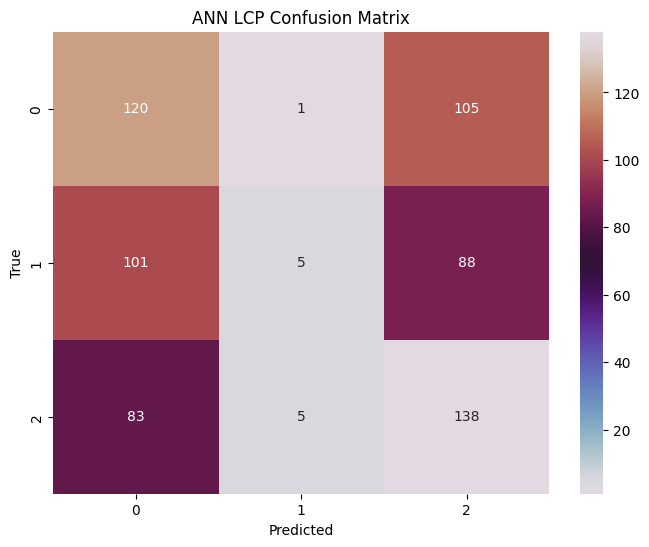

In [134]:
# Create confusion matrix
cmlcp = confusion_matrix(y_true_binary_lcp, y_pred_binary_lcp)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmlcp, annot=True, fmt="d", cmap="twilight")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('ANN LCP Confusion Matrix')
plt.show()

## Conclusion

Artificial neural network (ANN) model that has been trained and tested on different sets of features: MFCC (Mel-Frequency Cepstral Coefficients), PCP (Pitch Class Profiles), and LCP (Log-Chroma features). The training and testing accuracies for each feature set are provided.

1. **MFCC Feature:**
   - **Training Accuracy:** 76.87%
   - **Testing Accuracy:** 71.38%
   
   High training accuracy suggests that the model has learned well from the MFCC features during the training phase. However, there is a slight drop in testing accuracy, indicating a potential issue with overfitting. This could mean that the model may not generalize as well to new, unseen data.

2. **PCP Feature:**
   - **Training Accuracy:** 59.76%
   - **Testing Accuracy:** 59.13%
   
   The training and testing accuracies are quite close, suggesting that the model is generalizing reasonably well to new data. However, the overall accuracy is not as high as with the MFCC features, indicating that PCP features might not be as effective for this particular task.

3. **LCP Feature:**
   - **Training Accuracy:** 37.57%
   - **Testing Accuracy:** 40.25%
   
   Both the training and testing accuracies are relatively low, indicating that the model struggles to learn from the LCP features. This could be due to the features themselves not containing sufficient discriminative information for the task, or it may require further optimization of the model architecture or hyperparameters.

**Conclusion:**
- The MFCC features seem to be the most effective among the three, with the highest training and testing accuracies. However, there may be a slight overfitting issue that could be addressed by regularization techniques or increasing the size and diversity of the training dataset.
  
- The PCP features show decent generalization but still fall short compared to MFCC. It might be worth exploring other feature combinations or data preprocessing techniques to improve the model's performance.

- The LCP features exhibit the lowest accuracies, suggesting that these features alone may not be sufficient for the task. Consideration should be given to feature engineering or selecting a different set of features that capture more relevant information for the classification problem.

In summary, further analysis, experimentation, and potentially refining the model or feature extraction process could lead to improved performance. It's crucial to understand the characteristics of each feature set and iteratively refine the model to achieve better results.

### Why less accuracy seen?

Feature Relevance: 
The choice of features plays a crucial role. MFCC features are widely used in audio processing due to their ability to capture important characteristics of speech signals.

Feature Engineering: 
The extraction process for PCP and LCP features might not be optimized or might not capture the relevant information in the data as effectively as MFCC.

Model Complexity: The ANN architecture may not be well-suited for handling the specific characteristics represented by PCP and LCP features.

Data Characteristics: The distribution and nature of the data may favor certain types of features, and the less accurate features may not align well with the underlying patterns in the dataset.


To improve the accuracy for PCP and LCP features, you might consider exploring alternative feature representations, adjusting the model architecture, or further refining the feature extraction process. Experimenting with hyperparameter tuning and cross-validation could also provide insights into enhancing model performance.

In [ ]:
########################################################END#################################################################